<a href="https://colab.research.google.com/github/Swepstarling0/InteligenciaArtificial24/blob/main/PIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



PIA - alzheimer prediction

    Fernando Alvarez Cisneros 1952884
    Mariana Marcela Sepulveda Sanchez 1925531
    Alejandra Michelle Gutierrez Melchor 1977348



Librerias

In [1]:
import os
import zipfile
import cv2
import tensorflow as tf
import numpy as np
import gc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [4]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
License(s): GNU Lesser General Public License 3.0
augmented-alzheimer-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Preprocessing

In [5]:
zip_file = '/content/augmented-alzheimer-mri-dataset.zip'
extract_dir = '/content/Dataset'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Directorio del dataset
dataset_dir = extract_dir

In [6]:
# Verificar el contenido del directorio extraído
print("Contenido del directorio extraído:")
print(os.listdir(extract_dir))

Contenido del directorio extraído:
['AugmentedAlzheimerDataset', 'OriginalDataset']


In [7]:
augmented_dataset_dir = os.path.join(extract_dir, 'AugmentedAlzheimerDataset')
print(f"Contenido de {augmented_dataset_dir}:")
print(os.listdir(augmented_dataset_dir))
dataset_dir = augmented_dataset_dir

Contenido de /content/Dataset/AugmentedAlzheimerDataset:
['NonDemented', 'ModerateDemented', 'MildDemented', 'VeryMildDemented']


In [10]:
def cargar_datos(dataset_dir):
    imagenes = []
    etiquetas = []
    categorias = {
        'NonDemented': 0,
        'ModerateDemented': 1,
        'MildDemented': 1,
        'VeryMildDemented': 1
    }

    for label, value in categorias.items():
        folder_path = os.path.join(dataset_dir, label)
        if not os.path.exists(folder_path):
            print(f"Advertencia: La carpeta {folder_path} no existe.")
            continue
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Cargar la imagen en escala de grises
            if image is None:
                print(f"Advertencia: No se pudo cargar la imagen {image_path}.")
                continue
            image = cv2.resize(image, (64, 64))  # Redimensionar todas las imágenes a 128x128 píxeles
            imagenes.append(image)
            etiquetas.append(value)

    return np.array(imagenes), np.array(etiquetas)


# Cargar imágenes y etiquetas
imagenes, etiquetas = cargar_datos(dataset_dir)

# Normalizar las imágenes
imagenes = imagenes / 255.0

# Convertir etiquetas a formato categórico
etiquetas_categoricas = to_categorical(etiquetas)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(imagenes, etiquetas_categoricas, test_size=0.2, random_state=42)


Model and training

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc}')

Epoch 1/10
850/850 [==============================] - 156s 181ms/step - loss: 0.4608 - accuracy: 0.7955 - val_loss: 0.3920 - val_accuracy: 0.8290
Epoch 2/10
850/850 [==============================] - 157s 185ms/step - loss: 0.3472 - accuracy: 0.8550 - val_loss: 0.4139 - val_accuracy: 0.8229
Epoch 3/10
850/850 [==============================] - 151s 178ms/step - loss: 0.2599 - accuracy: 0.8978 - val_loss: 0.2461 - val_accuracy: 0.9061
Epoch 4/10
850/850 [==============================] - 150s 177ms/step - loss: 0.1883 - accuracy: 0.9295 - val_loss: 0.2127 - val_accuracy: 0.9144
Epoch 5/10
850/850 [==============================] - 152s 179ms/step - loss: 0.1321 - accuracy: 0.9536 - val_loss: 0.2045 - val_accuracy: 0.9295
Epoch 6/10
850/850 [==============================] - 150s 177ms/step - loss: 0.0927 - accuracy: 0.9693 - val_loss: 0.1817 - val_accuracy: 0.9431
Epoch 7/10
850/850 [==============================] - 149s 176ms/step - loss: 0.0689 - accuracy: 0.9774 - val_loss: 0.2110 -

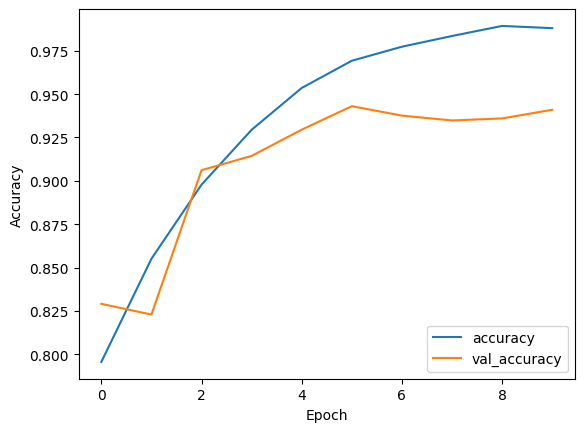

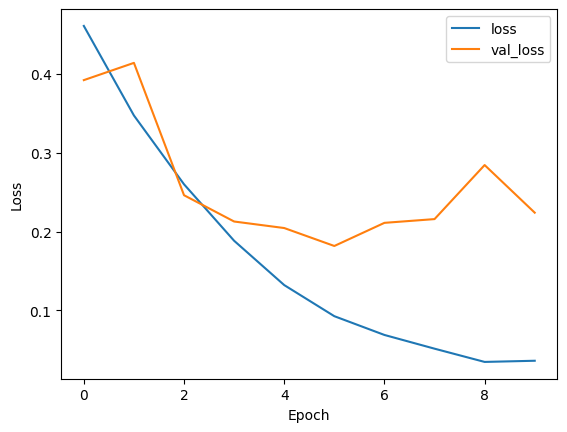

In [14]:
# Graficar las pérdidas y exactitudes
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Testing

In [24]:
predictions = model.predict(x_test)
label_map = {0: 'Not Demented', 1: 'Demented'}

def plot_image(i, predictions_array, true_label, img):
    true_label, img = np.argmax(true_label[i]), img[i].reshape(64, 64)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        predicted_label,
        100*np.max(predictions_array),
        true_label),
        color=color)

# Función para graficar la distribución de valores de predicción
def plot_value_array(i, predictions_array, true_label):
    true_label = np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

213/213 [==============================] - 10s 49ms/step


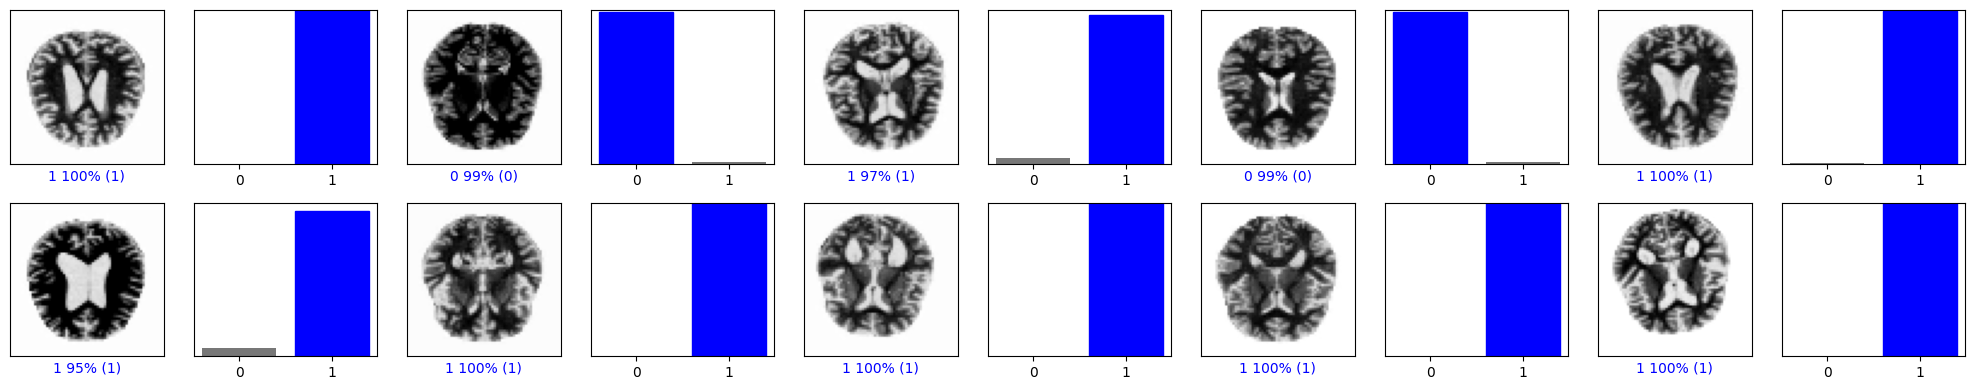

In [25]:
label_map = {0: 'Not Demented', 1: 'Demented'}
num_rows = 2
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()